In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm



In [128]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [129]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/case_study.csv")


# EDA

In [130]:
len(df)

8819

In [131]:
# Removing all empty rows
df = df.dropna(how='all')


In [132]:
df.tail(10)

,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,Partner,ReferralDomain,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters
3011,7/28/09,RUSSELL,russgarland196@aol.com,895F1933-648B-4185-9CDE-908BBF0F19BC,NaN,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,5.0,4.0,...,google,www.google.com,Debt Holding Tank,Holding Tank - Debt,Debt cures,debt cures,http://www.google.com/search,hl=en&q=debt cures&aq=7&oq=DEBT&aqi=g10,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...
3012,7/15/09,Michael,mrussell1127@hotmail.com,Z26Md0QFrkuMgZRApiJf0w,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-yellowarrow-blue,TopLeft-302252,DebtReductionInc,5.0,3.0,...,google,www.google.com,Debt General,Lower Payments,Lower monthly car payments,lower monthly car payment,http://www.google.com/url,q=lower monthly car payment&url=/aclk%3Fsa%3Dl...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=L...
3013,6/16/09,jason,jasonjkauffman@gmail.com,8967DD81-F17D-4D9F-84F2-DED051BA3BE2,NaN,w-302252-DebtReduction1-1DC,TopLeft-302252,DebtReductionInc,NaN,NaN,...,google,www.google.com,Debt General,Student Debt,Student loan default,student loans in default,http://www.google.com/search,sourceid=navclient&ie=UTF-8&rlz=1T4ADBF_enUS32...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=S...
3014,4/3/09,Kim,k-davis@cookchildrens.org,B85A389B-6FB7-44FA-A758-0819BFFB4361,NaN,w-300250-DebtReduction1-2DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,...,yahoo,search.yahoo.com,DebtReductionInc,Debt Consolidation,NaN,government debt consolidation fort worth texas,http://search.yahoo.com/search;_ylt=A0geu4teHt...,p=government debt consolidation fort worth tex...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...
3015,8/17/09,naw,doreenpan@gmail.com,51DDB7F0-D901-46AC-8949-BB9F3AF83B71,NaN,w-302252-DebtReduction1-1DC-yellowarrow,TopLeft-302252,DebtReductionInc,5.0,3.0,...,Google,www.debtreductioninc.com,DebtReductionInc,Lower Payments,NaN,NaN,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,http://www.debtreductioninc.com/index11.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
3016,6/30/09,amy,ahokett@sjc.edu,F42BBDFB-D44B-4890-A1B6-D1F0A3838214,NaN,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,NaN,NaN,...,yahoo,www.att.net,DebtReductionInc,Debt Consolidation,NaN,NaN,http://www.att.net/s/s.dll,spage=search/error.htm&searchtype=epa&source=a...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...
3017,4/25/09,brandy,brandy75137@yahoo.com,EA3703A3-61C9-40CE-92F7-61F0E02B1365,NaN,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Google,googleads.g.doubleclick.net,DebtReductionInc,Student Debt,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-7025449865608971&dt=124069479896...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
3018,4/12/09,jennifer,jennifer_woods48375@yahoo.com,64EB2632-E29E-4EB4-B361-45F1F0C735B5,NaN,w-300250-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,NaN,...,yahoo,search.yahoo.com,DebtReductionInc,Debt Consolidation,NaN,debt consolidation or settlement which is better,http://search.yahoo.com/search,ei=UTF-8&fr=yfp-t-501&SpellState=n-1665662351_...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...
3019,9/23/09,debra,debraroque@att.net,9126C7DB-F5BB-4CE1-BDCF-5E6F1841ADAD,NaN,w-302252-DebtReduction1-1DC-yellowarrow-dark,TopLeft-302252,DebtReductionInc,5.0,5.0,...,Google,NaN,state,Debt Negotiation,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/

In [133]:
# dropping IP Address column as its not needed
df = df.drop(columns=['IP Address'])


In [134]:
df

,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,Partner,ReferralDomain,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters
0,7/1/09,Dorinda,kanani@sandwichisles.net,FDF81FDA-A649-437B-B99C-FDDE74F7971B,NaN,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,5.0,...,google,www.google.com,Debt Holding Tank,Holding Tank - Debt,Debt specialists,debt specialists,http://www.google.com/search,sourceid=navclient&aq=1&oq=debt sp&ie=UTF-8&rl...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...
1,4/13/09,Presetta,clerk2@ustconline.net,4190ACB7-5026-416C-B987-ED8AD427D5E6,NaN,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,AdKnowledge,NaN,Financial Services,Consolidate,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
2,4/21/09,Gina,wagoner_gina@yahoo.com,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,AdKnowledge,us.mc582.mail.yahoo.com,Financial Services,Consolidate,NaN,NaN,http://us.mc582.mail.yahoo.com/mc/showMessage,&fid=Inbox&sort=date&order=down&startMid=0&.ra...,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
3,8/3/09,Kari,usa4ley@yahoo.com,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,...,Google,norwich.kijiji.com,DebtReductionInc,Lower Payments,NaN,NaN,http://norwich.kijiji.com/c-Cars-vehicles-Cars...,NaN,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
4,4/13/09,Stephanie,sr1lambert@embarqmail.com,D5B32074-458E-40EC-B185-1FEF20AC626D,NaN,w-300250-DebtReduction1-1DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Google,NaN,DebtReductionInc,Debt Reduction,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,6/30/09,amy,ahokett@sjc.edu,F42BBDFB-D44B-4890-A1B6-D1F0A3838214,NaN,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,NaN,NaN,...,yahoo,www.att.net,DebtReductionInc,Debt Consolidation,NaN,NaN,http://www.att.net/s/s.dll,spage=search/error.htm&searchtype=epa&source=a...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...
3017,4/25/09,brandy,brandy75137@yahoo.com,EA3703A3-61C9-40CE-92F7-61F0E02B1365,NaN,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Google,googleads.g.doubleclick.net,DebtReductionInc,Student Debt,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-7025449865608971&dt=124069479896...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
3018,4/12/09,jennifer,jennifer_woods48375@yahoo.com,64EB2632-E29E-4EB4-B361-45F1F0C735B5,NaN,w-300250-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,NaN,...,yahoo,search.yahoo.com,DebtReductionInc,Debt Consolidation,NaN,debt consolidation or settlement which is better,http://search.yahoo.com/search,ei=UTF-8&fr=yfp-t-501&SpellState=n-1665662351_...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...
3019,9/23/09,debra,debraroque@att.net,9126C7DB-F5BB-4CE1-BDCF-5E6F1841ADAD,NaN,w-302252-DebtReduction1-1DC-yellowarrow-dark,TopLeft-302252,DebtReductionInc,5.0,5.0,...,Google,NaN,state,Debt Negotiation,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...


In [135]:
df.dtypes

,0
LeadCreated,object
FirstName,object
Email,object
VendorLeadID,object
CallStatus,object
WidgetName,object
PublisherZoneName,object
PublisherCampaignName,object
AddressScore,float64
PhoneScore,float64


In [136]:
# converting datatype of LeadCreated from object to date for easier analysis
df['LeadCreated'] = pd.to_datetime(df['LeadCreated'])


<ipython-input-136-2cb066297cbd>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LeadCreated'] = pd.to_datetime(df['LeadCreated'])


In [137]:
null_counts=df.isna().sum()
null_counts

,0
LeadCreated,0
FirstName,0
Email,0
VendorLeadID,0
CallStatus,2140
WidgetName,0
PublisherZoneName,0
PublisherCampaignName,0
AddressScore,1850
PhoneScore,1628


In [138]:
df.nunique()

,0
LeadCreated,182
FirstName,1695
Email,2888
VendorLeadID,3013
CallStatus,7
WidgetName,14
PublisherZoneName,2
PublisherCampaignName,2
AddressScore,5
PhoneScore,5


# 1. Are we seeing any lead quality trends over time (improving, declining)? Are they statistically significant?

In [139]:
df['CallStatus'].unique()

array([nan, 'Unable to contact - Bad Contact Information',
       "Contacted - Doesn't Qualify", 'Closed', 'EP Received',
       'EP Confirmed', 'Contacted - Invalid Profile', 'EP Sent'],
      dtype=object)

In [140]:
# Creating a new column to map each CallStatus into Bad, Good and Best Lead Quality
status_mapping = {
    'Closed': 'Best lead quality',
    'EP Sent': 'Good lead quality',
    'EP Received': 'Good lead quality',
    'EP Confirmed': 'Good lead quality',
    'Unable to contact - Bad Contact Information': 'Bad lead quality',
    'Contacted - Invalid Profile': 'Bad lead quality',
    "Contacted - Doesn't Qualify" : 'Bad lead quality',
    "nan" :'Unkown'
}
# Map the callstatus values to the new groups
df['lead_quality'] = df['CallStatus'].map(status_mapping)

# Fill the unknown statuses
df['lead_quality'] = df['lead_quality'].fillna('Unknown')

# Display the resulting DataFrame
print(df[['CallStatus', 'lead_quality']])

                                       CallStatus      lead_quality
0                                             NaN           Unknown
1                                             NaN           Unknown
2     Unable to contact - Bad Contact Information  Bad lead quality
3                     Contacted - Doesn't Qualify  Bad lead quality
4                                             NaN           Unknown
...                                           ...               ...
3016                                          NaN           Unknown
3017                                          NaN           Unknown
3018                                          NaN           Unknown
3019                                          NaN           Unknown
3020                                          NaN           Unknown

[3021 rows x 2 columns]


In [141]:
df

,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,ReferralDomain,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters,lead_quality
0,2009-07-01,Dorinda,kanani@sandwichisles.net,FDF81FDA-A649-437B-B99C-FDDE74F7971B,NaN,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,5.0,...,www.google.com,Debt Holding Tank,Holding Tank - Debt,Debt specialists,debt specialists,http://www.google.com/search,sourceid=navclient&aq=1&oq=debt sp&ie=UTF-8&rl...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...,Unknown
1,2009-04-13,Presetta,clerk2@ustconline.net,4190ACB7-5026-416C-B987-ED8AD427D5E6,NaN,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,NaN,Financial Services,Consolidate,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...,Unknown
2,2009-04-21,Gina,wagoner_gina@yahoo.com,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,us.mc582.mail.yahoo.com,Financial Services,Consolidate,NaN,NaN,http://us.mc582.mail.yahoo.com/mc/showMessage,&fid=Inbox&sort=date&order=down&startMid=0&.ra...,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...,Bad lead quality
3,2009-08-03,Kari,usa4ley@yahoo.com,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,...,norwich.kijiji.com,DebtReductionInc,Lower Payments,NaN,NaN,http://norwich.kijiji.com/c-Cars-vehicles-Cars...,NaN,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,Bad lead quality
4,2009-04-13,Stephanie,sr1lambert@embarqmail.com,D5B32074-458E-40EC-B185-1FEF20AC626D,NaN,w-300250-DebtReduction1-1DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,...,NaN,DebtReductionInc,Debt Reduction,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,2009-06-30,amy,ahokett@sjc.edu,F42BBDFB-D44B-4890-A1B6-D1F0A3838214,NaN,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,NaN,NaN,...,www.att.net,DebtReductionInc,Debt Consolidation,NaN,NaN,http://www.att.net/s/s.dll,spage=search/error.htm&searchtype=epa&source=a...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...,Unknown
3017,2009-04-25,brandy,brandy75137@yahoo.com,EA3703A3-61C9-40CE-92F7-61F0E02B1365,NaN,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,googleads.g.doubleclick.net,DebtReductionInc,Student Debt,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-7025449865608971&dt=124069479896...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,Unknown
3018,2009-04-12,jennifer,jennifer_woods48375@yahoo.com,64EB2632-E29E-4EB4-B361-45F1F0C735B5,NaN,w-300250-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,NaN,...,search.yahoo.com,DebtReductionInc,Debt Consolidation,NaN,debt consolidation or settlement which is better,http://search.yahoo.com/search,ei=UTF-8&fr=yfp-t-501&SpellState=n-1665662351_...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...,Unknown
3019,2009-09-23,debra,debraroque@att.net,9126C7DB-F5BB-4CE1-BDCF-5E6F1841ADAD,NaN,w-302252-DebtReduction1-1DC-yellowarrow-dark,TopLeft-302252,DebtReductionInc,5.0,5.0,...,NaN,state,Debt Negotiation,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,Unknown


In [142]:
len(df)

3021

In [143]:
# creating a new column year month to extract month from LeadCreate
df['year_month'] = df['LeadCreated'].dt.to_period('M').dt.strftime('%b')


In [144]:
status_counts = df['lead_quality'].value_counts()
status_counts

,count
lead_quality,
Unknown,2140
Bad lead quality,488
Best lead quality,245
Good lead quality,148


In [145]:
#creating a new dataframe filtering unknown records for better insights w.r.t. lead quality
df_filtered=df[df['lead_quality']!='Unknown']
df_filtered.head()

,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters,lead_quality,year_month
2,2009-04-21,Gina,wagoner_gina@yahoo.com,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Financial Services,Consolidate,NaN,NaN,http://us.mc582.mail.yahoo.com/mc/showMessage,&fid=Inbox&sort=date&order=down&startMid=0&.ra...,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...,Bad lead quality,Apr
3,2009-08-03,Kari,usa4ley@yahoo.com,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,...,DebtReductionInc,Lower Payments,NaN,NaN,http://norwich.kijiji.com/c-Cars-vehicles-Cars...,NaN,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,Bad lead quality,Aug
7,2009-04-22,John,johndoe333@yahoo.com,hxFrkNSCjU6rE2u-7yH-KQ,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-2DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Credit,Debt Credit Services,Credit services,credit services,http://www.google.com/search,q=credit services&rls=com.microsoft:*&ie=UTF-8...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=D...,Bad lead quality,Apr
10,2009-06-01,Juan,villalobosjgv@yahoo.com,LfatQ19SFkWfP3-hH7TVTQ,Unable to contact - Bad Contact Information,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,NaN,...,DebtReductionInc,Credit Card Debt - high volume,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-7277345023380563&host=pub-155622...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,Bad lead quality,Jun
17,2009-08-01,Kandi,kandielko@verizon.net,7YvjZQLOi0aAT7DhiqDISg,Unable to contact - Bad Contact Information,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,3.0,3.0,...,DebtReductionInc,Credit Card Debt - high volume,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-3089121361425291&dt=124917730077...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,Bad lead quality,Aug


In [146]:
status_counts = df_filtered['lead_quality'].value_counts()
status_counts

,count
lead_quality,
Bad lead quality,488
Best lead quality,245
Good lead quality,148


In [147]:
# Group by month and grouped_status
grouped = df_filtered.groupby(['year_month', 'lead_quality']).size().unstack(fill_value=0)
grouped


lead_quality,Bad lead quality,Best lead quality,Good lead quality
year_month,,,
Apr,57,56,23
Aug,67,41,21
Jul,110,33,16
Jun,141,63,23
May,57,37,22
Sep,56,15,43


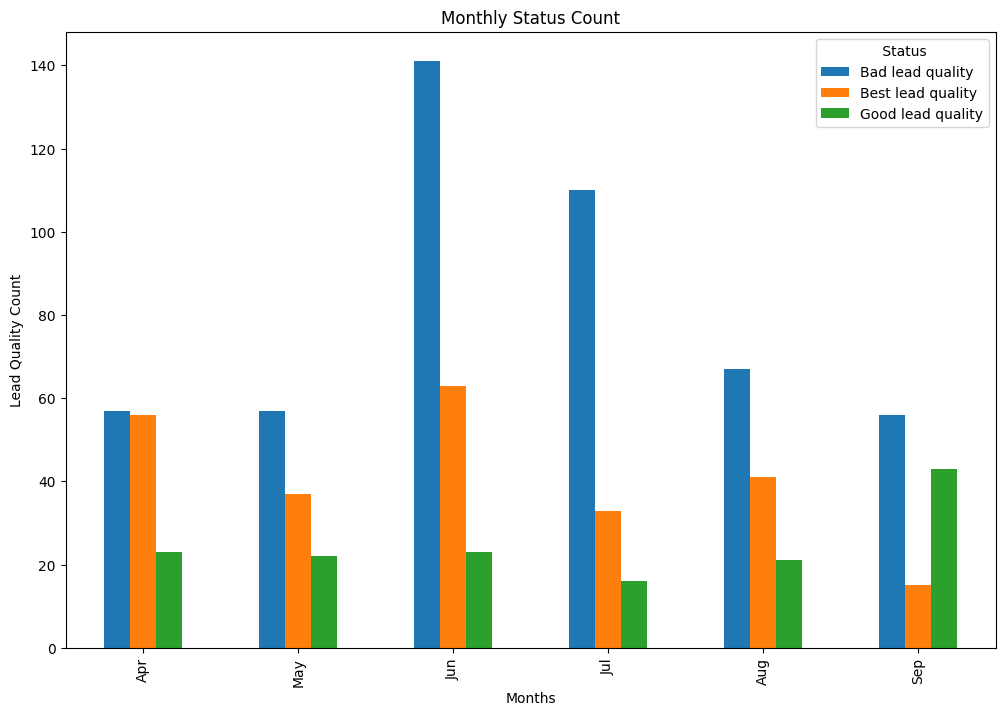

In [148]:

 #Sort the index by date
grouped = grouped.reindex(sorted(grouped.index, key=lambda x: pd.to_datetime(x, format='%b')))

grouped.plot(kind='bar', stacked=False, figsize=(12, 8))

# Setting the title and labels
plt.title('Monthly Status Count')
plt.xlabel('Months')
plt.ylabel('Lead Quality Count')
plt.legend(title=' Status')

plt.show()

In [149]:
def perform_regression(df, status):
    df_status = df[[status]].dropna().reset_index()
    df_status['date_ordinal'] = pd.to_datetime(df_status['year_month'], format='%b').map(pd.Timestamp.toordinal)
    X = df_status['date_ordinal']
    y = df_status[status]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    return model

# Perform regression for each grouped status
for status in grouped.columns:
    model = perform_regression(grouped, status)
    print(f"Regression results for {status}:")
    print(model.summary())
    print("\n")

Regression results for Bad lead quality:
                            OLS Regression Results                            
Dep. Variable:       Bad lead quality   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.250
Method:                 Least Squares   F-statistic:                 0.0004304
Date:                Sun, 04 Aug 2024   Prob (F-statistic):              0.984
Time:                        18:03:50   Log-Likelihood:                -29.436
No. Observations:                   6   AIC:                             62.87
Df Residuals:                       4   BIC:                             62.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const  

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [150]:
# Perform the Chi-Square test
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(grouped)

# Display the results
print(f"Chi-Square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Interpret the result
alpha = 0.05
if p < alpha:
    print("There is a significant difference in lead quality counts over time (reject H0).")
else:
    print("There is no significant difference in lead quality counts over time (fail to reject H0).")


Chi-Square statistic: 75.83785343992369
p-value: 3.2675999598781904e-12
Degrees of freedom: 10
Expected frequencies:
[[ 75.33257662  37.82065834  22.84676504]
 [ 64.25425653  32.25879682  19.48694665]
 [125.73893303  63.12712826  38.13393871]
 [ 88.07264472  44.21679909  26.71055619]
 [ 71.45516459  35.87400681  21.6708286 ]
 [ 63.14642452  31.70261067  19.15096481]]
There is a significant difference in lead quality counts over time (reject H0).


**Analysis:**

Bad lead quality consistently has a higher count compared to Best lead quality and Good lead quality.

If we have a month-wise view, June has the highest number of Bad Quality leads, followed by July. April and June have the highest count of Best Quality leads.
There is no clear upward or downward trend in the lead quality categories over the months.

Since our p values is significant;y < 0.05 we reject the Null Hypothesis

**Recommendations:**

Improve Lead Quality: The consistently high number of Bad lead quality leads indicates a need for improving lead generation strategies. Focusing on targeting and qualification processes might help increase the proportion of Best and Good lead quality leads.

# 2. Whether WidgetName affects lead quality

In [151]:
df_filtered

,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters,lead_quality,year_month
2,2009-04-21,Gina,wagoner_gina@yahoo.com,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Financial Services,Consolidate,NaN,NaN,http://us.mc582.mail.yahoo.com/mc/showMessage,&fid=Inbox&sort=date&order=down&startMid=0&.ra...,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...,Bad lead quality,Apr
3,2009-08-03,Kari,usa4ley@yahoo.com,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,...,DebtReductionInc,Lower Payments,NaN,NaN,http://norwich.kijiji.com/c-Cars-vehicles-Cars...,NaN,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,Bad lead quality,Aug
7,2009-04-22,John,johndoe333@yahoo.com,hxFrkNSCjU6rE2u-7yH-KQ,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-2DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Credit,Debt Credit Services,Credit services,credit services,http://www.google.com/search,q=credit services&rls=com.microsoft:*&ie=UTF-8...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=D...,Bad lead quality,Apr
10,2009-06-01,Juan,villalobosjgv@yahoo.com,LfatQ19SFkWfP3-hH7TVTQ,Unable to contact - Bad Contact Information,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,NaN,...,DebtReductionInc,Credit Card Debt - high volume,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-7277345023380563&host=pub-155622...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,Bad lead quality,Jun
17,2009-08-01,Kandi,kandielko@verizon.net,7YvjZQLOi0aAT7DhiqDISg,Unable to contact - Bad Contact Information,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,3.0,3.0,...,DebtReductionInc,Credit Card Debt - high volume,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-3089121361425291&dt=124917730077...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,Bad lead quality,Aug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,2009-09-29,Mariana,marianadit@gmail.com,aFyR8rv4206QKiv_xj0E5g,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,5.0,1.0,...,DebtReductionInc,Debt Consolidation,NaN,goverment debts consolidation,http://search.yahoo.com/search,p=goverment debts consolidation&toggle=1&cop=m...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...,Bad lead quality,Sep
3006,2009-05-09,Audelia,ada.bautista@sbcglobal.net,cxRZiF10jUKXiaLHJPv2Ww,Closed,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,NaN,NaN,...,DebtReductionInc,General Debt,NaN,govt debt relief,http://search.yahoo.com/search;_ylt=Ar7g1XHyUV...,p=govt debt relief&fr=att-portal-s&toggle=1&co...,http://www.debtreductioninc.com/index8.html,utm_source=yahoo&utm_medium=cpc&utm_campaign=D...,Best lead quality,May
3009,2009-07-08,Kelly,kellybelleone@hotmail.com,vPAQIg1UhEabykCa5wpEYg,EP Confirmed,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,5.0,...,Debt General,Get Out Of Debt,Get out of credit debt,how to get out of credit card debt without paying,http://www.google.com/search,sourceid=navclient&aq=6&oq=how to get out of c...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=G...,Good lead quality,Jul
3010,2009-06-19,Lucy,lucyaac@yahh.com,Z-OkvmLqCE20wNaeS__oOg,Contacted - Doesn't Qualify,w-302252-DebtRed

In [152]:
df_filtered['WidgetName'].value_counts()

,count
WidgetName,
w-302252-DebtReduction1-1DC-CreditSolutions,304
w-300250-DebtReduction1-1DC,136
w-302252-DebtReduction1-1DC-white,113
w-302252-DebtReduction1-1DC-yellowarrow-blue,80
w-302252-DebtReduction1-1DC,70
w-302252-DebtReduction1-1DC-yellowarrow-dark,40
w-300250-DebtReduction1-1DC-CreditSolutions,23
w-300250-DebtReduction1-1DC-Head2,22
w-300250-DebtReduction1-2DC-BlueMeter,21


In [153]:
# Group by WidgetName and lead_quality
widget_quality= df_filtered.groupby(['WidgetName', 'lead_quality']).size().unstack(fill_value=0)
widget_quality


lead_quality,Bad lead quality,Best lead quality,Good lead quality
WidgetName,,,
w-300250-DebtReduction1-1DC,80,34,22
w-300250-DebtReduction1-1DC-BlueMeter,4,13,1
w-300250-DebtReduction1-1DC-CreditSolutions,5,12,6
w-300250-DebtReduction1-1DC-Head2,8,11,3
w-300250-DebtReduction1-1DC-Head3,7,4,1
w-300250-DebtReduction1-1DC-white,0,1,0
w-300250-DebtReduction1-2DC-BlueMeter,9,6,6
w-300250-DebtReduction1-2DC-CreditSolutions,12,6,2
w-302252-DebtReduction1-1DC,38,23,9


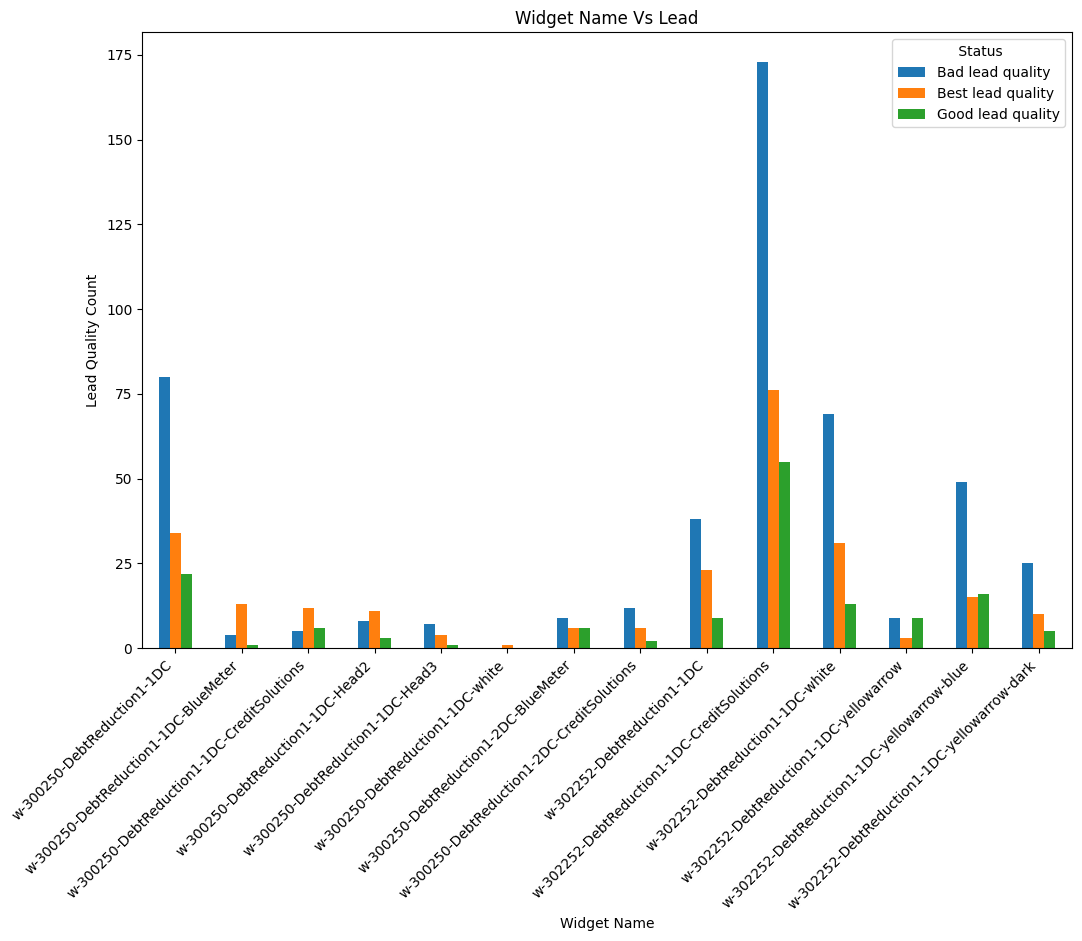

In [154]:
 #Sort the index by date
widget_quality = widget_quality.reindex(sorted(widget_quality.index))

widget_quality.plot(kind='bar', stacked=False, figsize=(12, 8))

# Setting the title and labels
plt.title('Widget Name Vs Lead')
plt.xlabel('Widget Name')
plt.ylabel('Lead Quality Count')
plt.xticks(rotation=45, ha='right')

plt.legend(title=' Status')

plt.show()

In [155]:
# Create a contingency table
contingency_table = pd.crosstab(df_filtered['WidgetName'], df_filtered['lead_quality'])

# Display the contingency table to ensure it's correct
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Interpret the result
alpha = 0.05
if p < alpha:
    print("The variables are dependent (reject H0).")
else:
    print("The variables are independent (fail to reject H0).")

Contingency Table:
lead_quality                                  Bad lead quality  \
WidgetName                                                       
w-300250-DebtReduction1-1DC                                 80   
w-300250-DebtReduction1-1DC-BlueMeter                        4   
w-300250-DebtReduction1-1DC-CreditSolutions                  5   
w-300250-DebtReduction1-1DC-Head2                            8   
w-300250-DebtReduction1-1DC-Head3                            7   
w-300250-DebtReduction1-1DC-white                            0   
w-300250-DebtReduction1-2DC-BlueMeter                        9   
w-300250-DebtReduction1-2DC-CreditSolutions                 12   
w-302252-DebtReduction1-1DC                                 38   
w-302252-DebtReduction1-1DC-CreditSolutions                173   
w-302252-DebtReduction1-1DC-white                           69   
w-302252-DebtReduction1-1DC-yellowarrow                      9   
w-302252-DebtReduction1-1DC-yellowarrow-blue             

**Analysis:**

w-302252-DebtReduction1-1DC-CreditSolutions has the highest volume of leads across all categories with 173 bad leads, 76 best leads, and 55 good leads. This indicates that while this widget generates a high number of leads, a significant portion is of bad quality.
Across most widgets, there is a higher number of bad quality leads compared to best and good quality leads. This trend is particularly pronounced in high volume widgets like w-302252-DebtReduction1-1DC-CreditSolutions and w-300250-DebtReduction1-1DC.

**Recommendations:**

Increase investment in widgets like w-300250-DebtReduction1-1DC-BlueMeter and w-302252-DebtReduction1-1DC-yellowarrow-blue, which show a better distribution of best and good quality leads.
Investigate and address issues with widgets that generate a high number of bad leads, especially those with high volumes.
Analyze the characteristics and strategies of widgets that generate a higher proportion of best quality leads and apply those learnings to improve underperforming widgets.


# 2.1 What can we learn about the drivers of "lead quality" from this dataset?
# where the ad was shown?

In [156]:
# Group by WidgetName and lead_quality
campaign_quality= df_filtered.groupby(['PublisherCampaignName','lead_quality']).size().unstack(fill_value=0)
campaign_quality


lead_quality,Bad lead quality,Best lead quality,Good lead quality
PublisherCampaignName,,,
DebtReductionCallCenter,66,26,18
DebtReductionInc,422,219,130


In [157]:
# Calculate total leads for each campaign
campaign_quality['Total leads'] = campaign_quality.sum(axis=1)

# Calculate proportions
campaign_quality['Bad lead quality %'] = campaign_quality['Bad lead quality'] / campaign_quality['Total leads'] * 100
campaign_quality['Best lead quality %'] = campaign_quality['Best lead quality'] / campaign_quality['Total leads'] * 100
campaign_quality['Good lead quality %'] = campaign_quality['Good lead quality'] / campaign_quality['Total leads'] * 100

campaign_quality

lead_quality,Bad lead quality,Best lead quality,Good lead quality,Total leads,Bad lead quality %,Best lead quality %,Good lead quality %
PublisherCampaignName,,,,,,,
DebtReductionCallCenter,66,26,18,110,60.000000,23.636364,16.363636
DebtReductionInc,422,219,130,771,54.734112,28.404669,16.861219


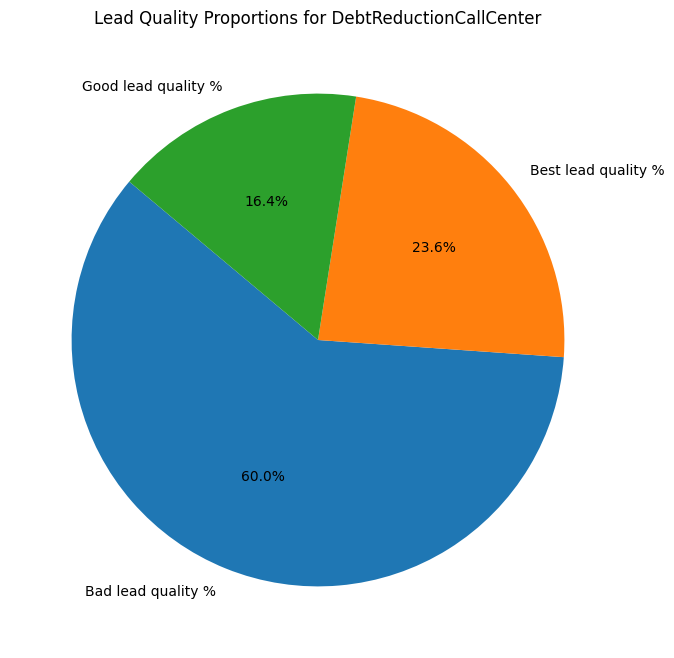

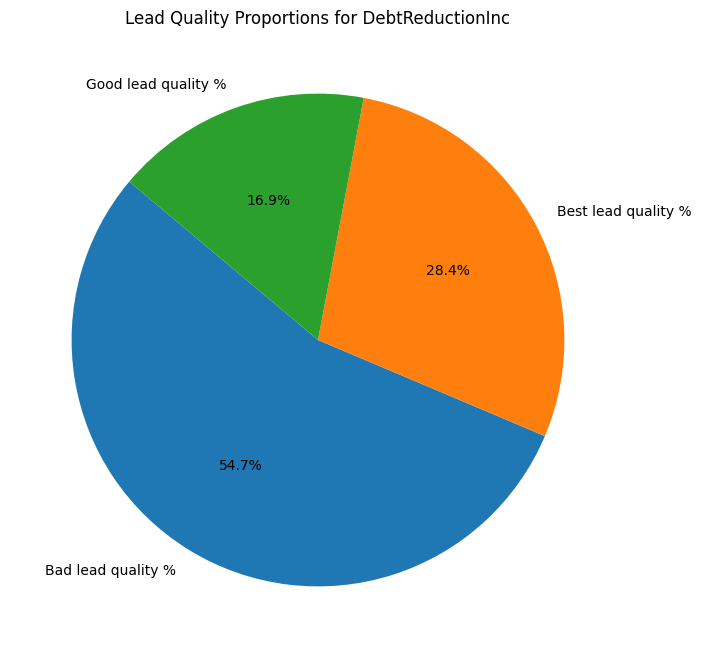

In [158]:
proportions = campaign_quality[['Bad lead quality %', 'Best lead quality %', 'Good lead quality %']]
def plot_pie_chart(data, campaign_name):
    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Lead Quality Proportions for {campaign_name}')
    plt.show()

# Plot for each campaign
for campaign in proportions.index:
    plot_pie_chart(proportions.loc[campaign], campaign)

**Analysis:**

DebtReductionInc generates a significantly higher volume of leads compared to DebtReductionCallCenter. This could be due to the ease of filling out forms online versus calling an 800#.

The proportion of bad leads is relatively high for both sources, but slightly higher for the DebtReductionCallCenter. This suggests that the quality of leads from phone calls might be slightly lower than those from online forms, indicating that online forms might attract more qualified leads.

**Recommendations:**

Provide additional training for call center staff to help them better identify and nurture potential high-quality leads. This can include training on effective communication techniques and understanding customer needs.

Simplify and optimize the online forms to ensure they capture the necessary information without being too cumbersome for potential leads. This can help in reducing drop-offs and improving lead quality.


# What can we learn about the drivers of "lead quality" from this dataset? What segments - where the ad was shown

In [159]:
df_filtered['Partner'].unique()

array(['AdKnowledge', 'Google', 'google', 'yahoo', 'Advertise.com',
       'Call_Center'], dtype=object)

In [160]:
# combining google and Google
df_filtered['Partner']=df_filtered['Partner'].str.lower()
#df_filtered['Partner']

<ipython-input-160-716f17716d0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Partner']=df_filtered['Partner'].str.lower()


In [161]:
# Group by partner and lead_quality
partner_quality= df_filtered.groupby(['Partner','lead_quality']).size().unstack(fill_value=0)
partner_quality

lead_quality,Bad lead quality,Best lead quality,Good lead quality
Partner,,,
adknowledge,23,21,11
advertise.com,0,1,0
call_center,66,26,18
google,252,123,57
yahoo,147,74,62


In [162]:
# Calculate total leads for each campaign
partner_quality['Total leads'] = partner_quality.sum(axis='columns')

# Calculate proportions
partner_quality['Bad lead quality %'] = partner_quality['Bad lead quality'] / partner_quality['Total leads'] * 100
partner_quality['Best lead quality %'] = partner_quality['Best lead quality'] / partner_quality['Total leads'] * 100
partner_quality['Good lead quality %'] = partner_quality['Good lead quality'] / partner_quality['Total leads'] * 100

partner_quality

lead_quality,Bad lead quality,Best lead quality,Good lead quality,Total leads,Bad lead quality %,Best lead quality %,Good lead quality %
Partner,,,,,,,
adknowledge,23,21,11,55,41.818182,38.181818,20.000000
advertise.com,0,1,0,1,0.000000,100.000000,0.000000
call_center,66,26,18,110,60.000000,23.636364,16.363636
google,252,123,57,432,58.333333,28.472222,13.194444
yahoo,147,74,62,283,51.943463,26.148410,21.908127


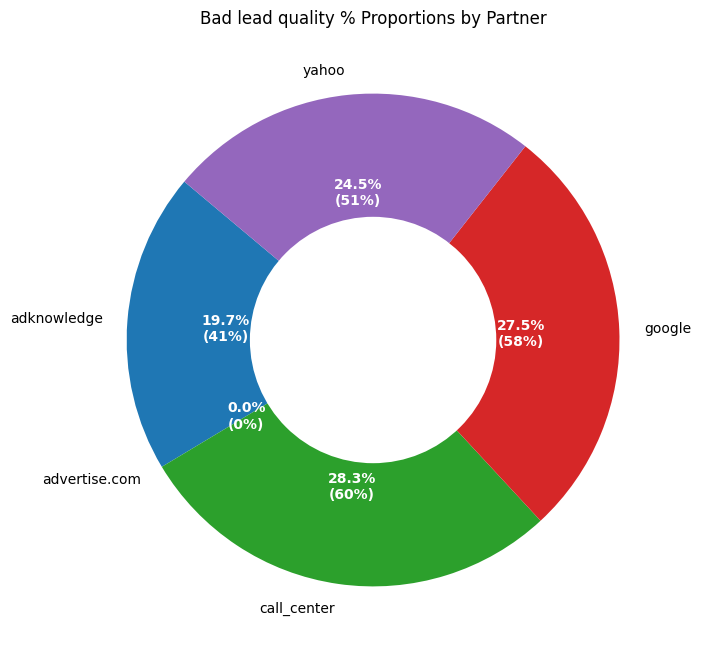

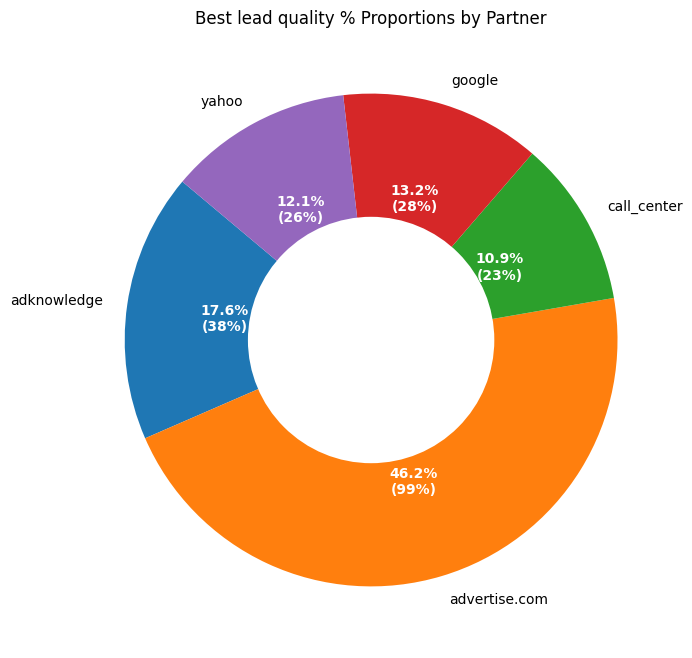

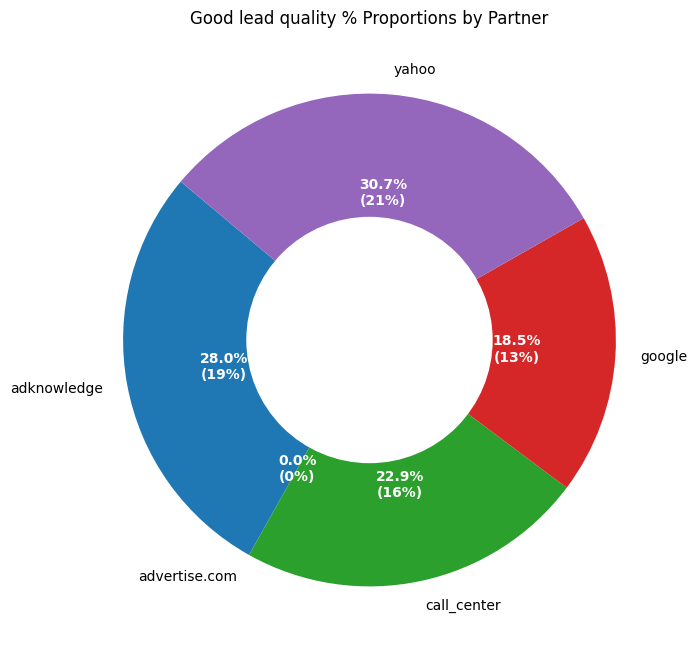

In [166]:
def plot_donut_chart(data, lead_quality_type):
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(data, labels=data.index, autopct=lambda p: f'{p:.1f}%\n({int(p*sum(data)/100)}%)', startangle=140)
    plt.setp(autotexts, size=10, weight="bold", color="white")
    plt.title(f'{lead_quality_type} Proportions by Partner')
    plt.gca().add_artist(plt.Circle((0,0),0.50,fc='white')) # Creating the donut hole
    plt.show()

# Plot donut charts for each lead quality category
for quality in ['Bad lead quality %', 'Best lead quality %', 'Good lead quality %']:
    plot_donut_chart(partner_quality[quality], quality)

In [167]:

# Create a contingency table
contingency_table = pd.crosstab(df_filtered['Partner'], df_filtered['lead_quality'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

Chi-square Statistic: 17.381454040141595
P-value: 0.026373251124411908
Degrees of Freedom: 8
Expected Frequencies:
[[3.04653802e+01 1.52951192e+01 9.23950057e+00]
 [5.53916005e-01 2.78093076e-01 1.67990919e-01]
 [6.09307605e+01 3.05902384e+01 1.84790011e+01]
 [2.39291714e+02 1.20136209e+02 7.25720772e+01]
 [1.56758229e+02 7.87003405e+01 4.75414302e+01]]


**Analysis:**

Bad quality lead is highest in call center followed by adknowdledge with a Proportion of 41.8%.

Advertise.com has a proportion of 100% for best lead quality.
This is due to the single lead being of the best quality, which may not be statistically significant but indicates potential.
Google shows a best lead quality proportion of 28.47%, which is lower compared to Advertise.com but higher than some other partners.

Yahoo's contribution to good lead quality is 21.9%.
This is the highest among the partners, indicating that Yahoo generates a balanced mix of good quality leads.

**Recommendations:**

Since Call Center and Google sources have the highest proportions of bad lead quality, it's crucial to review and improve the lead generation processes for these partners.

Yahoo shows a balanced lead quality distribution with the highest proportion of good lead quality leads.
Focus on strategies that could convert these good quality leads into the best quality leads, optimizing the lead quality further.

# 2.2 What can we learn about the drivers of "lead quality" from this dataset? what kind of person filled out the ad

In [168]:
df_filtered['DebtLevel'].unique()

array(['20001-30000', '7500-15000', '7500-10000', 'More_than_100000',
       '70001-90000', '10001-15000', '30001-50000', '50001-70000',
       '15001-20000', '90000-100000'], dtype=object)

In [169]:
def debt_level_to_int(debt_level):
    if debt_level == 'More_than_100000':
        return 100001
    else:
        lower, upper = map(int, debt_level.split('-'))
        return (lower + upper) // 2

# Apply the conversion to create a new column with integer debt levels
df_filtered['DebtLevel_int'] = df_filtered['DebtLevel'].apply(debt_level_to_int)

# Display the DataFrame with the new integer column
df_filtered.head()

<ipython-input-169-3eb14a9c8d8e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DebtLevel_int'] = df_filtered['DebtLevel'].apply(debt_level_to_int)


,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters,lead_quality,year_month,DebtLevel_int
2,2009-04-21,Gina,wagoner_gina@yahoo.com,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Consolidate,NaN,NaN,http://us.mc582.mail.yahoo.com/mc/showMessage,&fid=Inbox&sort=date&order=down&startMid=0&.ra...,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...,Bad lead quality,Apr,25000
3,2009-08-03,Kari,usa4ley@yahoo.com,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,...,Lower Payments,NaN,NaN,http://norwich.kijiji.com/c-Cars-vehicles-Cars...,NaN,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,Bad lead quality,Aug,25000
7,2009-04-22,John,johndoe333@yahoo.com,hxFrkNSCjU6rE2u-7yH-KQ,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-2DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Debt Credit Services,Credit services,credit services,http://www.google.com/search,q=credit services&rls=com.microsoft:*&ie=UTF-8...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=D...,Bad lead quality,Apr,11250
10,2009-06-01,Juan,villalobosjgv@yahoo.com,LfatQ19SFkWfP3-hH7TVTQ,Unable to contact - Bad Contact Information,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Credit Card Debt - high volume,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-7277345023380563&host=pub-155622...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,Bad lead quality,Jun,25000
17,2009-08-01,Kandi,kandielko@verizon.net,7YvjZQLOi0aAT7DhiqDISg,Unable to contact - Bad Contact Information,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,3.0,3.0,...,Credit Card Debt - high volume,NaN,NaN,http://googleads.g.doubleclick.net/pagead/ads,client=ca-pub-3089121361425291&dt=124917730077...,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...,Bad lead quality,Aug,8750


In [170]:
# Group by partner and lead_quality
debt_quality= df_filtered.groupby(['DebtLevel_int','lead_quality']).size().unstack(fill_value=0)
debt_quality

lead_quality,Bad lead quality,Best lead quality,Good lead quality
DebtLevel_int,,,
8750,109,22,9
11250,26,19,12
12500,49,34,20
17500,49,35,22
25000,70,40,32
40000,84,39,22
60000,34,22,16
80000,16,18,7
95000,13,9,2


In [171]:
# Calculate total leads for each debt level
debt_quality['Total leads'] = debt_quality.sum(axis=1)

# Calculate proportions
debt_quality['Bad lead quality %'] = debt_quality['Bad lead quality'] / debt_quality['Total leads'] * 100
debt_quality['Best lead quality %'] = debt_quality['Best lead quality'] / debt_quality['Total leads'] * 100
debt_quality['Good lead quality %'] = debt_quality['Good lead quality'] / debt_quality['Total leads'] * 100
debt_quality

lead_quality,Bad lead quality,Best lead quality,Good lead quality,Total leads,Bad lead quality %,Best lead quality %,Good lead quality %
DebtLevel_int,,,,,,,
8750,109,22,9,140,77.857143,15.714286,6.428571
11250,26,19,12,57,45.614035,33.333333,21.052632
12500,49,34,20,103,47.572816,33.009709,19.417476
17500,49,35,22,106,46.226415,33.018868,20.754717
25000,70,40,32,142,49.295775,28.169014,22.535211
40000,84,39,22,145,57.931034,26.896552,15.172414
60000,34,22,16,72,47.222222,30.555556,22.222222
80000,16,18,7,41,39.024390,43.902439,17.073171
95000,13,9,2,24,54.166667,37.500000,8.333333


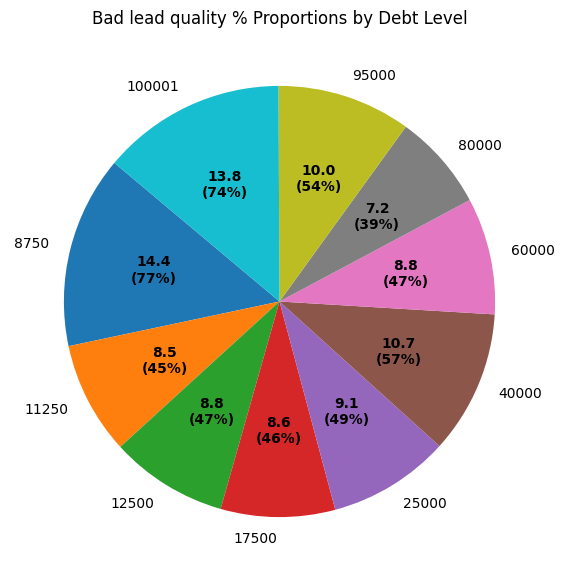

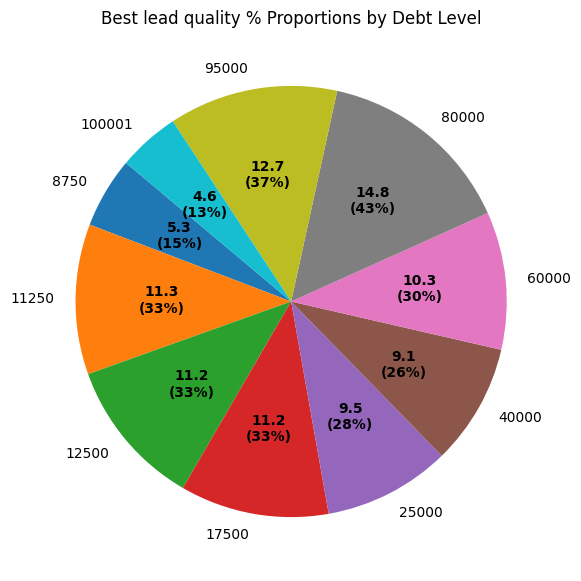

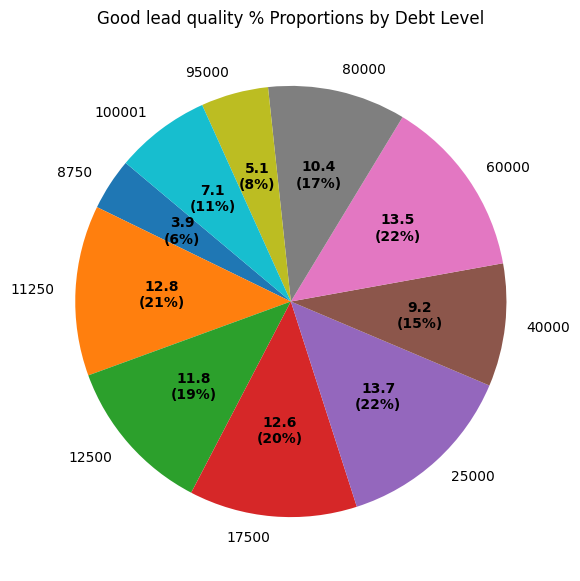

In [172]:

# Function to plot pie chart for each lead quality
def plot_pie_chart(data, lead_quality_type):
    plt.figure(figsize=(10, 7))
    wedges, texts, autotexts = plt.pie(data, labels=data.index, autopct=lambda p: f'{p:.1f}\n({int(p*sum(data)/100)}%)', startangle=140)
    plt.setp(autotexts, size=10, weight="bold", color="black")
    plt.title(f'{lead_quality_type} Proportions by Debt Level')
    plt.show()

# Plot pie charts for each lead quality category
for quality in ['Bad lead quality %', 'Best lead quality %', 'Good lead quality %']:
    plot_pie_chart(debt_quality[quality], quality)

**Analysis:**

Lower debt levels (e.g, 8,750)  tend to generate a higher proportion of bad quality leads and lower proportions of best quality leads.

Higher debt levels (e.g, 40,000, 60,000) generally produce a more balanced mix of good and best quality leads.

**Recommendations:**

Focus on improving lead quality strategies or re-evaluating lead generation methods for lower debt levels to reduce the proportion of bad quality leads.

Allocate more resources and focus on debt levels that produce high proportions of best quality leads (e.g., 25,000, 40,000) to maximize overall lead quality and conversion rates.


In [173]:
df_filtered['State'].unique()

array(['NY', 'WA', 'IA', 'TX', 'IL', 'MD', 'AZ', 'VA', 'CA', 'MI', 'OR',
       'DC', 'FL', 'MA', 'IN', 'AL', 'WV', 'CO', 'PA', 'NM', 'OK', 'SD',
       'NE', 'AR', 'NV', 'CT', 'ND', 'HI', 'MT', 'MO', 'LA', 'AK'],
      dtype=object)

In [174]:
# Define East Coast and West Coast states
east_coast_states = ['NY', 'MD', 'VA', 'DC', 'FL', 'MA', 'PA', 'CT']
west_coast_states = ['WA', 'CA', 'OR']

# Function to categorize states
def categorize_state(state):
    if state in east_coast_states:
        return 'East Coast'
    elif state in west_coast_states:
        return 'West Coast'
    else:
        return 'Other'

# Apply the categorization function to create a new column
df_filtered['coast'] = df_filtered['State'].apply(categorize_state)

# Display the DataFrame with the new column
df_filtered['coast'].head()

<ipython-input-174-4369236a9803>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['coast'] = df_filtered['State'].apply(categorize_state)


,coast
2,East Coast
3,West Coast
7,Other
10,Other
17,Other


In [175]:
# Group by partner and lead_quality
coast_quality= df_filtered.groupby(['coast','lead_quality']).size().unstack(fill_value=0)
coast_quality

lead_quality,Bad lead quality,Best lead quality,Good lead quality
coast,,,
East Coast,158,66,48
Other,241,130,64
West Coast,89,49,36


In [176]:
# Calculate total leads for each debt level
coast_quality['Total leads'] = coast_quality.sum(axis=1)

# Calculate proportions
coast_quality['Bad lead quality %'] = coast_quality['Bad lead quality'] / coast_quality['Total leads'] * 100
coast_quality['Best lead quality %'] = coast_quality['Best lead quality'] / coast_quality['Total leads'] * 100
coast_quality['Good lead quality %'] = coast_quality['Good lead quality'] / coast_quality['Total leads'] * 100
coast_quality

lead_quality,Bad lead quality,Best lead quality,Good lead quality,Total leads,Bad lead quality %,Best lead quality %,Good lead quality %
coast,,,,,,,
East Coast,158,66,48,272,58.088235,24.264706,17.647059
Other,241,130,64,435,55.402299,29.885057,14.712644
West Coast,89,49,36,174,51.149425,28.160920,20.689655


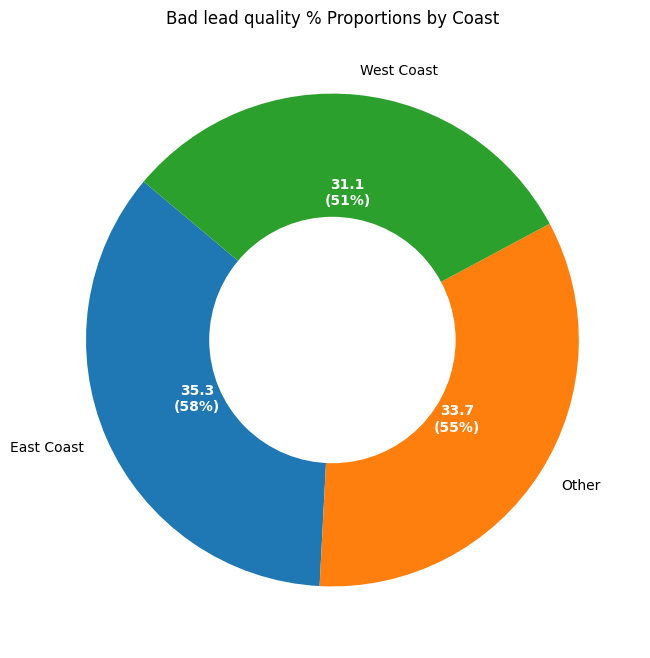

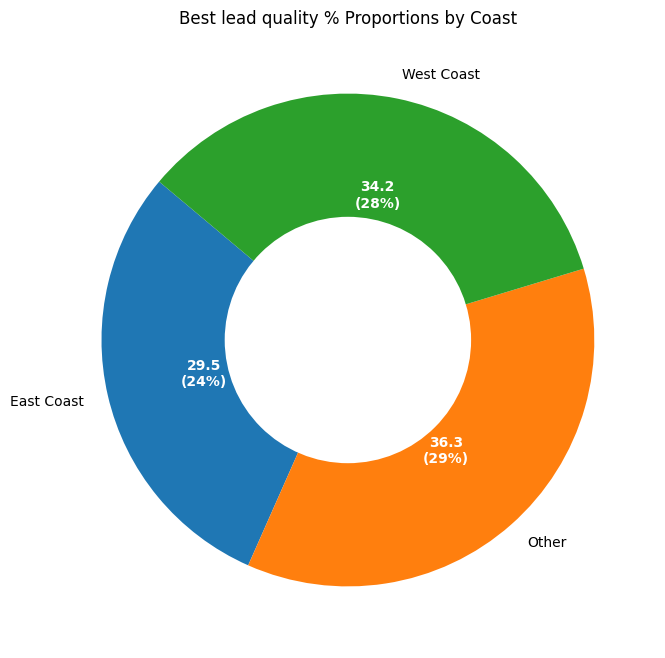

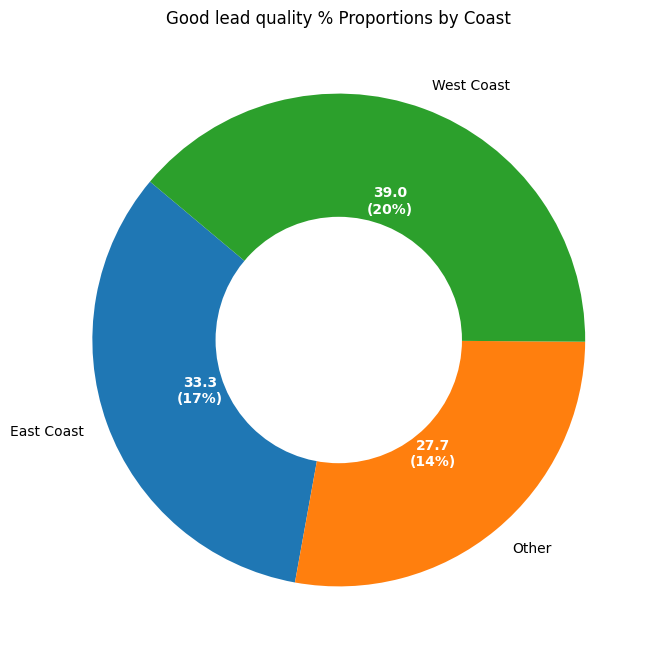

In [177]:
def plot_donut_chart(data, lead_quality_type):
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(data, labels=data.index, autopct=lambda p: f'{p:.1f}\n({int(p*sum(data)/100)}%)', startangle=140)
    plt.setp(autotexts, size=10, weight="bold", color="white")
    plt.title(f'{lead_quality_type} Proportions by Coast')
    plt.gca().add_artist(plt.Circle((0,0),0.50,fc='white')) # Creating the donut hole
    plt.show()

# Plot donut charts for each lead quality category
for quality in ['Bad lead quality %', 'Best lead quality %', 'Good lead quality %']:
    plot_donut_chart(coast_quality[quality], quality)

**Analysis:**

East Coast has the higher % of bad quality lead and it indicates that leads from the East Coast are more likely to be of lower quality compared to other regions.

Other states comparatively have good amount of Best quality lead than east coast and west Coast.

West Coast exhibits the highest proportion of good lead quality at 20.7%.
This implies that leads from the West Coast are more balanced, with a substantial portion being of good quality.

**Recommendations:**

Since the East Coast has the highest proportion of bad quality leads, it's crucial to review and enhance lead generation strategies specific to this region. Implement stricter filtering criteria and targeted marketing efforts to improve lead quality from this region.

With a higher proportion of best quality leads, the strategies used in "Other" regions can provide valuable insights.
Analyze and replicate successful lead generation tactics from these regions to other regions, particularly the East Coast.

# 2.3 What can we learn about the drivers of "lead quality" from this dataset?what kind of ad did they see

In [178]:
df_filtered['AdvertiserCampaignName'].unique()

array(['Debt Settlement1 Master', 'creditsolutions-branded-shortform'],
      dtype=object)

In [179]:
# Group by partner and lead_quality
ad_quality= df_filtered.groupby(['AdvertiserCampaignName','lead_quality']).size().unstack(fill_value=0)
ad_quality

lead_quality,Bad lead quality,Best lead quality,Good lead quality
AdvertiserCampaignName,,,
Debt Settlement1 Master,298,151,85
creditsolutions-branded-shortform,190,94,63


**Analysis:**

Debt Settlement1 Master has a significant number of bad quality leads at 298.
Indicates that this campaign may have issues in targeting the right audience or filtering leads effectively.

Debt Settlement1 Master also has 151 best quality leads.
This shows that despite the high number of bad leads, there is also a considerable number of high-quality leads, indicating potential in the campaign if optimizations are made.

**Recommendations:**

Given the high number of bad quality leads, it is essential to review and improve the targeting strategies and lead qualification criteria.

Implement strategies to convert good quality leads into the best quality category, such as personalized follow-ups, targeted offers, and improved customer engagement tactics.


# 3. If the advertiser says they will increase our CPL by 20% (i.e., $30 to $33) if we increase our lead quality by 20% (i.e., from 8.0% to 9.6%), do we see any opportunities to do that here? What kinds of things could we do?

In [181]:
good_leads = ["Best lead quality", "Good lead quality"]  # Closed and leads considered good
bad_leads = ["Bad lead quality"]

In [182]:
total_leads = len(df_filtered)
good_leads_count = df_filtered[df_filtered['lead_quality'].isin(good_leads)].shape[0]

Lead Quality Rate=( Total Number of Leads/Number of High-Quality Leads) * 100


In [183]:
current_quality_rate = (good_leads_count / total_leads) * 100
print(f"Current Lead Quality Rate: {current_quality_rate:.2f}%")

Current Lead Quality Rate: 44.61%


In [184]:
#Calculate the target lead quality rate after a 20% increase.
target_quality_rate = current_quality_rate * 1.20
print(f"Target Lead Quality Rate: {target_quality_rate:.2f}%")

Target Lead Quality Rate: 53.53%


In [185]:
# Distribution of lead dispositions
lead_distribution = df_filtered['lead_quality'].value_counts()
print(lead_distribution)

# Calculate the number of leads needed to meet the target quality rate
needed_good_leads_count = (target_quality_rate / 100) * total_leads
current_good_leads_needed = max(0, needed_good_leads_count - good_leads_count)
print(f"Additional Good Leads Needed: {current_good_leads_needed:.0f}")

lead_quality
Bad lead quality     488
Best lead quality    245
Good lead quality    148
Name: count, dtype: int64
Additional Good Leads Needed: 79


In [186]:
# Print results
print(f"Current Lead Quality Rate: {current_quality_rate:.2f}%")
print(f"Target Lead Quality Rate: {target_quality_rate:.2f}%")
print(f"Additional Good Leads Needed: {current_good_leads_needed:.0f}")

# Lead distribution
lead_distribution = df_filtered['lead_quality'].value_counts()
print("Lead Distribution:")
print(lead_distribution)

Current Lead Quality Rate: 44.61%
Target Lead Quality Rate: 53.53%
Additional Good Leads Needed: 79
Lead Distribution:
lead_quality
Bad lead quality     488
Best lead quality    245
Good lead quality    148
Name: count, dtype: int64


**Analysis:**

We can see that if we increase our current lead quality rate by 20%, we need additional 79 more good leads in order to fulfill the target.

**Recommendations:**

The suggestions for improving lead quality include:

Improving the contact rate for 'Unable to Contact' leads.
Validating lead profiles more thoroughly to reduce 'Invalid Profile' leads.
Adjusting targeting criteria to reduce 'Doesn't Qualify' leads.
Reviewing and following up on 'Unknown' leads to determine their quality.